In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
dataset1 = pd.read_csv('dataset.csv', header=None)
dataset1.columns = ['Input', 'Output']
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [9]:
import numpy as np

# Convert X_train and X_test to numeric, coercing errors
# Flatten to apply to_numeric, then reshape back to original dimensions
X_train_numeric = pd.to_numeric(X_train.flatten(), errors='coerce').reshape(-1, 1)
X_test_numeric = pd.to_numeric(X_test.flatten(), errors='coerce').reshape(-1, 1)

# Convert y_train and y_test to numeric, coercing errors
y_train_numeric = pd.to_numeric(y_train.flatten(), errors='coerce').reshape(-1, 1)
y_test_numeric = pd.to_numeric(y_test.flatten(), errors='coerce').reshape(-1, 1)

# Identify valid (non-NaN) indices for X_train and y_train to remove header rows if present
valid_train_indices = ~np.isnan(X_train_numeric).flatten() & ~np.isnan(y_train_numeric).flatten()
X_train_cleaned = X_train_numeric[valid_train_indices]
y_train_cleaned = y_train_numeric[valid_train_indices]

# Identify valid (non-NaN) indices for X_test and y_test to remove header rows if present
valid_test_indices = ~np.isnan(X_test_numeric).flatten() & ~np.isnan(y_test_numeric).flatten()
X_test_cleaned = X_test_numeric[valid_test_indices]
y_test_cleaned = y_test_numeric[valid_test_indices]

# Initialize and apply the MinMaxScaler to the cleaned data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_cleaned)
X_test = scaler.transform(X_test_cleaned)

In [11]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_cleaned, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_cleaned, dtype=torch.float32).view(-1, 1)

In [13]:
# Name: Sandhiya M
# Register Number: 212224220086
class Neuralnet(nn.Module):
   def __init__(self):
        super().__init__()
        self.n1=nn.Linear(1,10)
        self.n2=nn.Linear(10,20)
        self.n3=nn.Linear(20,1)
        self.relu=nn.ReLU()
        self.history={'loss': []}
   def forward(self,x):
        x=self.relu(self.n1(x))
        x=self.relu(self.n2(x))
        x=self.n3(x)
        return x

In [14]:
# Initialize the Model, Loss Function, and Optimizer
ai_brain=Neuralnet()
criterion=nn.MSELoss()
optimizer=optim.RMSprop(ai_brain.parameters(),lr=0.001)

In [15]:
# Name: Sandhiya M
# Register Number: 212224220086
def train_model(ai_brain,x_train,y_train,criteria,optmizer,epochs=4000):
    for i in range(epochs):
        optimizer.zero_grad()
        loss=criterion(ai_brain(x_train),y_train)
        loss.backward()
        optimizer.step()

        ai_brain.history['loss'].append(loss.item())
        if i%200==0:
            print(f"Epoch [{i}/epochs], loss: {loss.item():.6f}")

In [16]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/epochs], loss: 29949.482422
Epoch [200/epochs], loss: 24525.568359
Epoch [400/epochs], loss: 14943.413086
Epoch [600/epochs], loss: 5203.958984
Epoch [800/epochs], loss: 562.344604
Epoch [1000/epochs], loss: 166.696030
Epoch [1200/epochs], loss: 105.722191
Epoch [1400/epochs], loss: 38.939919
Epoch [1600/epochs], loss: 4.280738
Epoch [1800/epochs], loss: 0.014907
Epoch [2000/epochs], loss: 0.094540
Epoch [2200/epochs], loss: 0.048303
Epoch [2400/epochs], loss: 0.046485
Epoch [2600/epochs], loss: 0.041709
Epoch [2800/epochs], loss: 0.044851
Epoch [3000/epochs], loss: 0.044140
Epoch [3200/epochs], loss: 0.044324
Epoch [3400/epochs], loss: 0.044325
Epoch [3600/epochs], loss: 0.044296
Epoch [3800/epochs], loss: 0.044309


In [17]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 194216448.000000


In [18]:
loss_df = pd.DataFrame(ai_brain.history)

Name: Sandhiya M A
Reg No: 212224220086


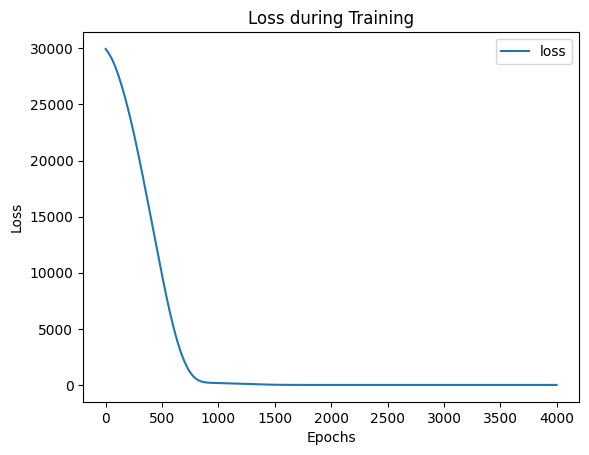

In [20]:
import matplotlib.pyplot as plt
loss_df.plot()
print("Name: Sandhiya M A\nReg No: 212224220086")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [21]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 1196.52294921875
